In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Exporting Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1YL9yfiyL3cZJki5GnVpWqO2KnWqwFpwCAPos2ywpz5Q/edit#gid=1614382195'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data = pd.read_csv(sheet_url_trf)
data

Label                                                Isi  \
0      Pembuka                                       selamat sore   
1      Pembuka                                       terima kasih   
2       Gejala                                        sakit perut   
3       Gejala                                            kembung   
4       Gejala                                   sering buang gas   
...        ...                                                ...   
1671  Tindakan                               Istirahat yang cukup   
1672  Tindakan             Makan makanan dengan nutrisi yang baik   
1673  Tindakan                          Menjaga berat badan ideal   
1674  Tindakan  Berkonsultasi lebih lanjut ke dokter spesialis...   
1675   Penutup                                        Salam sehat   

      questionflag  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
1671             0  
1672             0  
1673             0  
1674             0  
1675             0  

[1676 rows x 3 columns]

# Preprocess

## Removing Punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data['Isi'] = data['Isi'].apply(remove_punctuation)
data.head(10)

Label                          Isi  questionflag
0   Pembuka                 selamat sore             0
1   Pembuka                 terima kasih             0
2    Gejala                  sakit perut             0
3    Gejala                      kembung             0
4    Gejala             sering buang gas             0
5  Penyakit  asam lambung yang meningkat             0
6  Penyakit                    Dispepsia             0
7  Penyebab                   pola makan             0
8  Penyebab   gaya hidup yang tidak baik             0
9  Penyebab       Sering terlambat makan             0

## Removing Character

In [ ]:
data['Isi']=data['Isi'].str.replace('(?:\@|https?\://)\S+', '')
data['Isi']=data['Isi'].str.replace('[^\w\s]',' ')
#ilangin enter
data['Isi']=data['Isi'].str.lower()
#ilangin spasi berlebih
data['Isi'] = data['Isi'].replace('\s+', ' ', regex=True)
#ilangin simbol
data['Isi'] = data['Isi'].replace('\n',' ',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


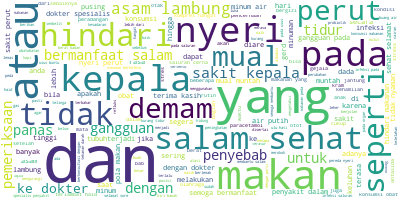

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Dapat terlihat bahwa masih terdapat beberapa kalimat stopword yang ada di dalam cloud words


## Removing Stopwords

In [ ]:
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data['Isi'] = data['Isi'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

Label                                       Isi  questionflag
0      Pembuka                              selamat sore             0
1      Pembuka                              terima kasih             0
2       Gejala                               sakit perut             0
3       Gejala                                   kembung             0
4       Gejala                                 buang gas             0
...        ...                                       ...           ...
1671  Tindakan                                 istirahat             0
1672  Tindakan                     makan makanan nutrisi             0
1673  Tindakan                 menjaga berat badan ideal             0
1674  Tindakan  berkonsultasi dokter spesialis kandungan             0
1675   Penutup                               salam sehat             0

[1676 rows x 3 columns]

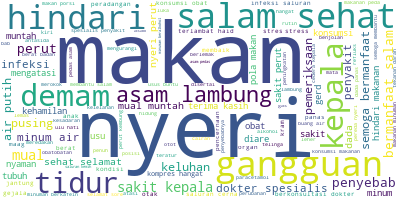

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Stemming

In [ ]:
# create an object of stemming function
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
data['Isi'] = data['Isi'].apply(stemming)
data.head(10)

Label                   Isi  questionflag
0   Pembuka          selamat sore             0
1   Pembuka          terima kasih             0
2    Gejala           sakit perut             0
3    Gejala               kembung             0
4    Gejala             buang gas             0
5  Penyakit  asam lambung tingkat             0
6  Penyakit             dispepsia             0
7  Penyebab            pola makan             0
8  Penyebab            gaya hidup             0
9  Penyebab          lambat makan             0

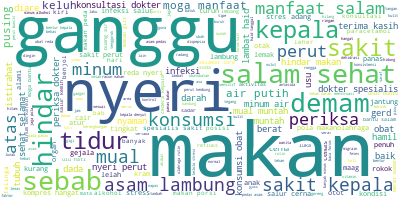

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Analysis

In [ ]:
data

Label                                  Isi  questionflag
0      Pembuka                         selamat sore             0
1      Pembuka                         terima kasih             0
2       Gejala                          sakit perut             0
3       Gejala                              kembung             0
4       Gejala                            buang gas             0
...        ...                                  ...           ...
1671  Tindakan                            istirahat             0
1672  Tindakan                  makan makan nutrisi             0
1673  Tindakan               jaga berat badan ideal             0
1674  Tindakan  konsultasi dokter spesialis kandung             0
1675   Penutup                          salam sehat             0

[1676 rows x 3 columns]

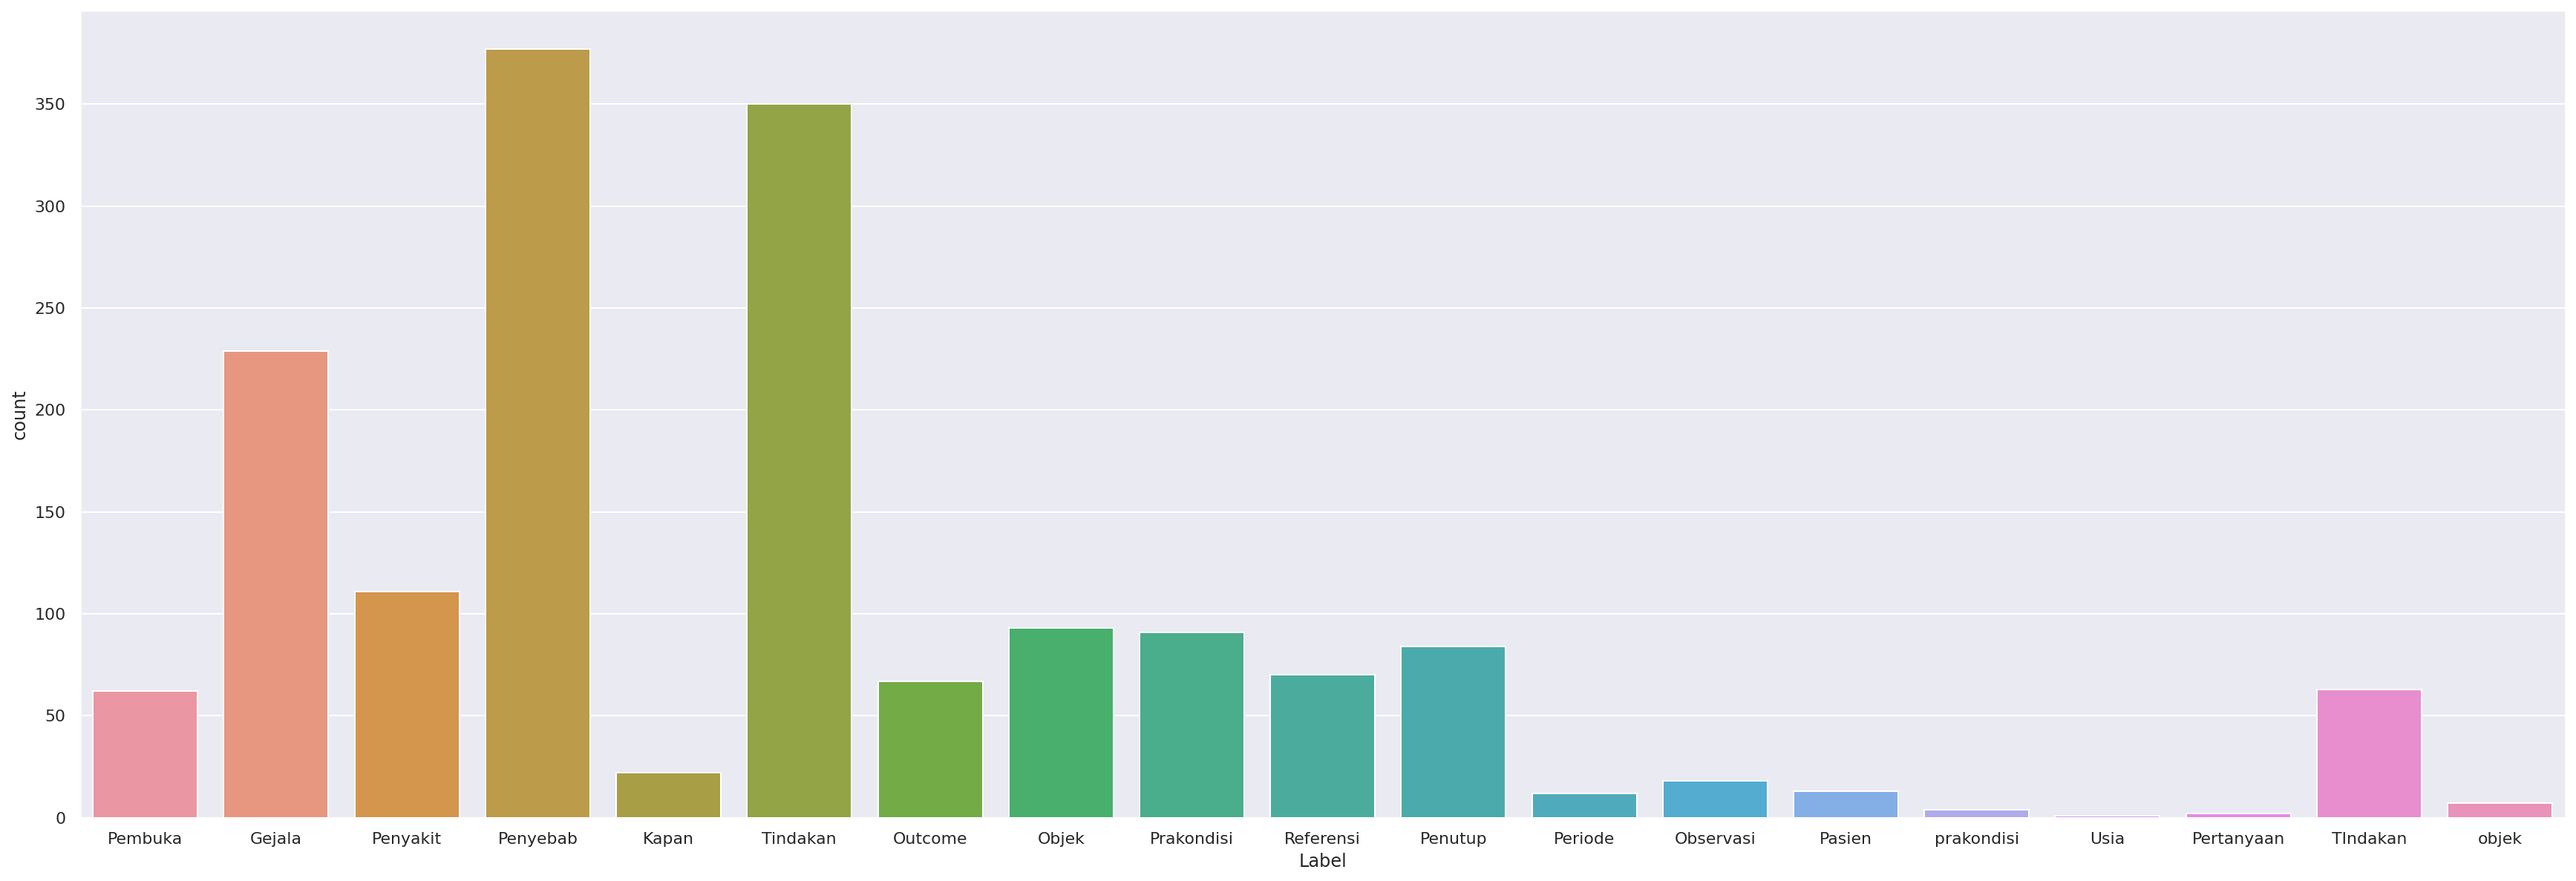

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x="Label", data=data)

In [ ]:
data['Label']=data['Label'].str.lower()

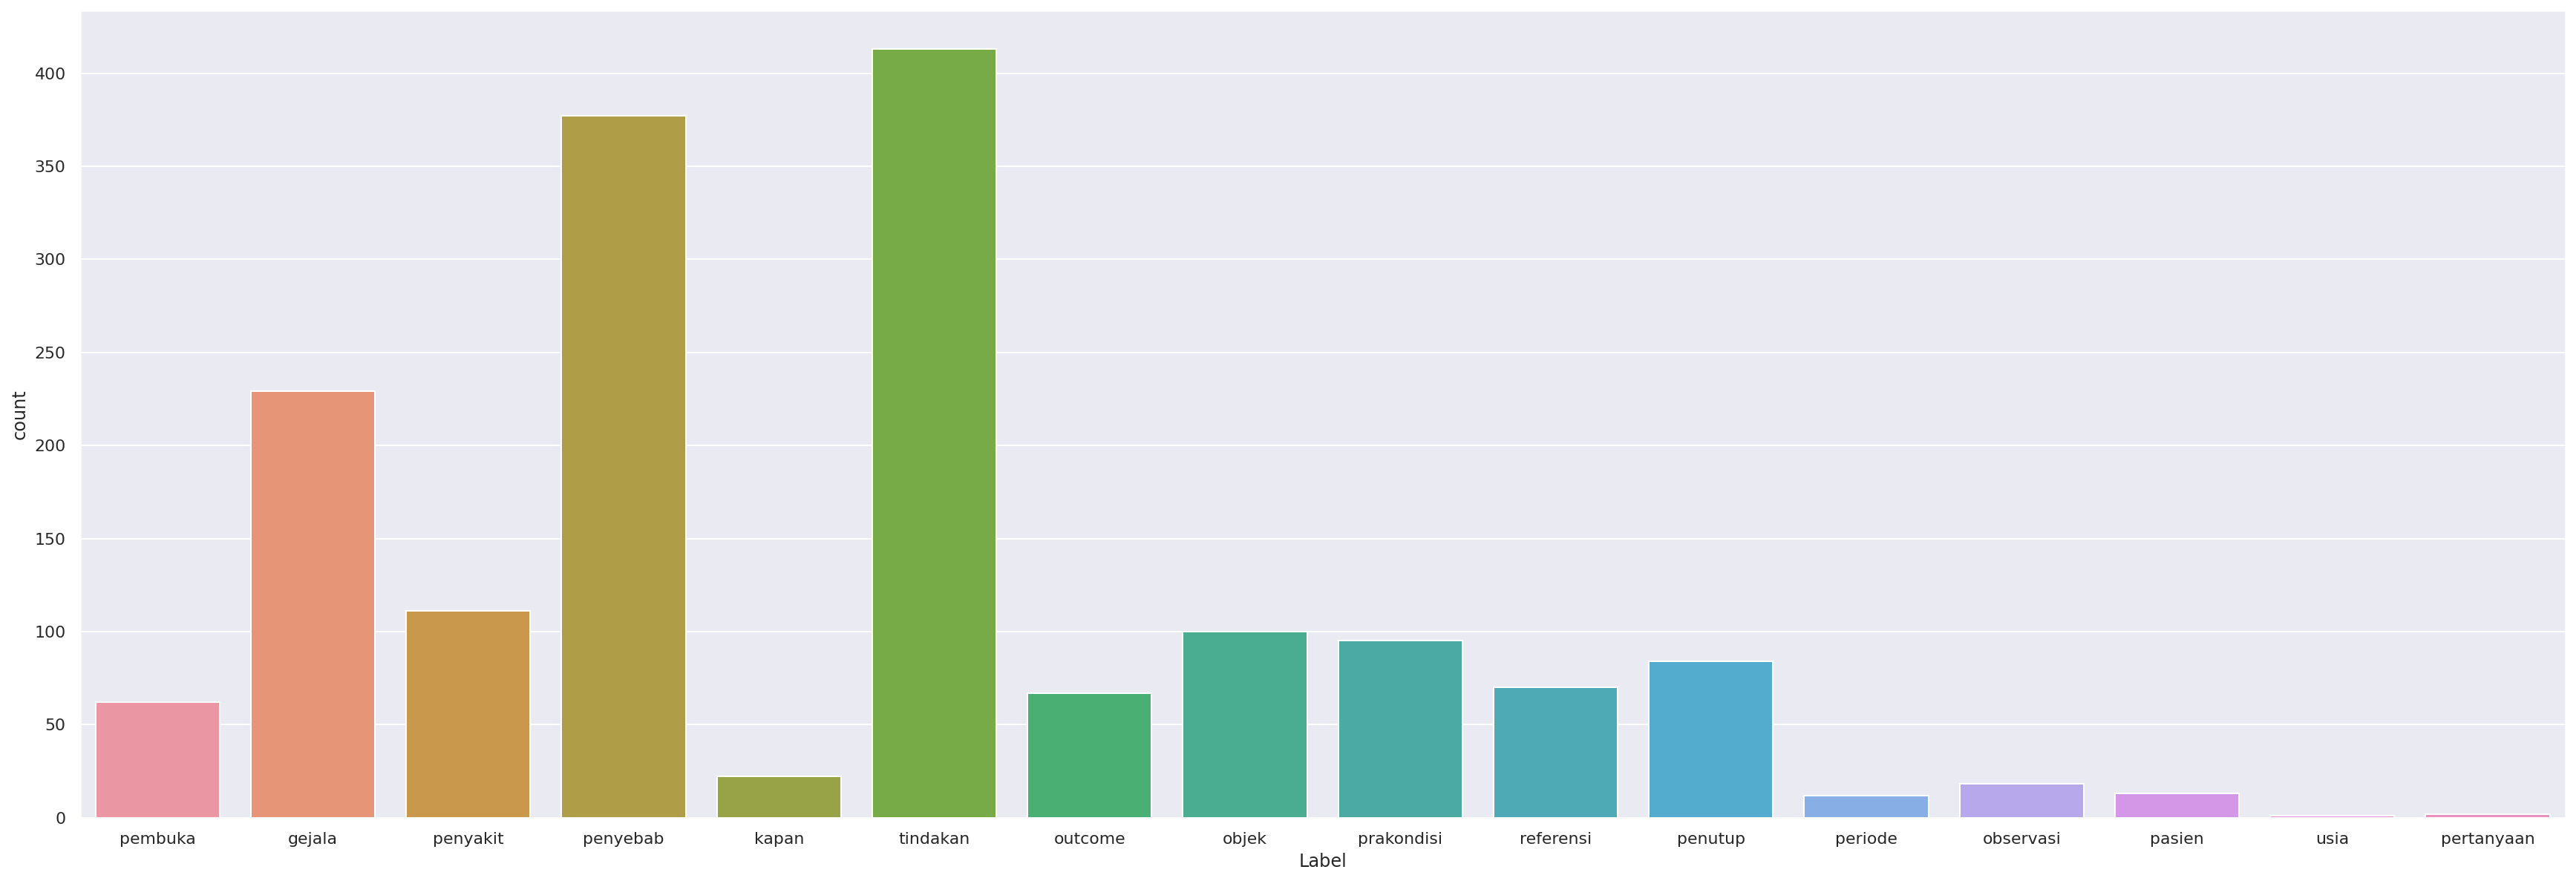

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x="Label", data=data)

In [ ]:
df = data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

# TFID

## Model 80% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1340
Banyak data x_test  : 336
Banyak data y_train : 1340
Banyak data y_test  : 336


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      82
penyebab      73
gejala        41
penyakit      24
penutup       20
outcome       16
objek         16
prakondisi    16
pembuka       14
referensi     13
kapan         11
periode        3
observasi      3
pasien         3
usia           1
Name: Label, dtype: int64

### MultinomialNB

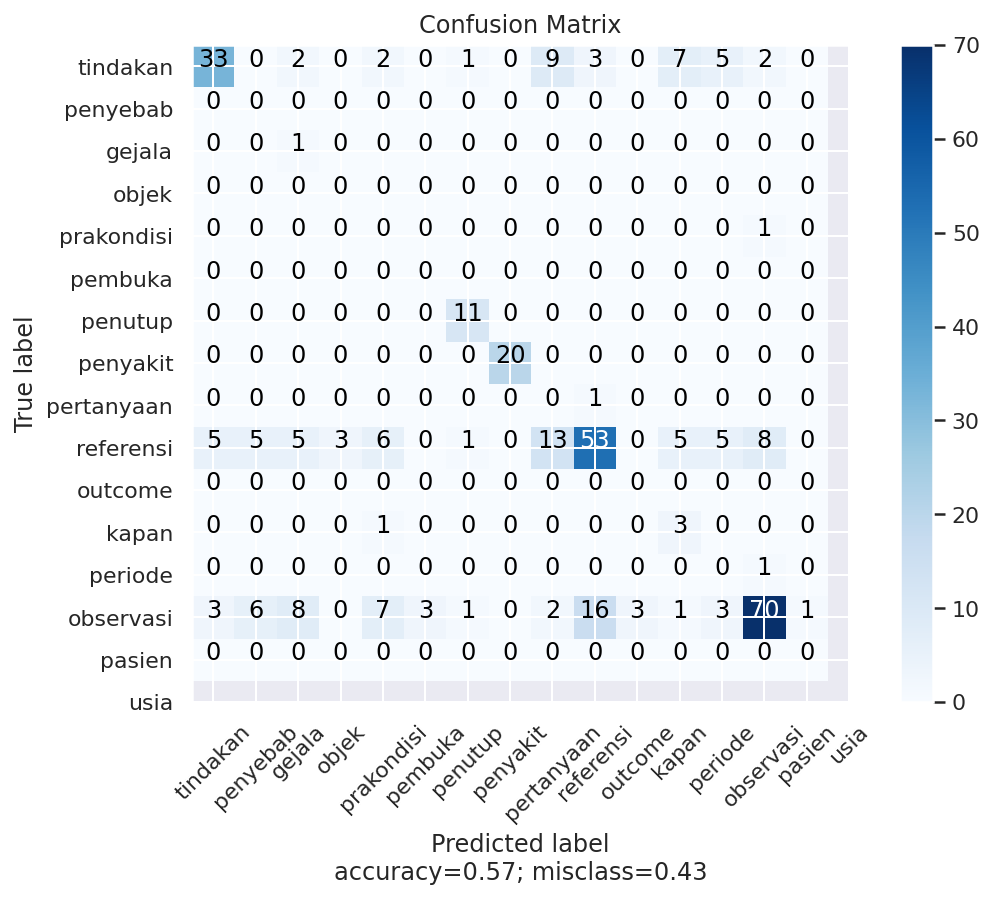

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.52      0.80      0.63        41
       kapan       0.00      0.00      0.00        11
       objek       1.00      0.06      0.12        16
   observasi       0.00      0.00      0.00         3
     outcome       0.00      0.00      0.00        16
      pasien       0.00      0.00      0.00         3
     pembuka       1.00      0.79      0.88        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.00      0.00      0.00        24
    penyebab       0.49      0.73      0.58        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.75      0.19      0.30        16
   referensi       0.00      0.00      0.00        13
    tindakan       0.56      0.85      0.68        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.57       336
   macro avg       0.35      0.29      0.28       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.5684523809523809


### SVM, Linear SVC

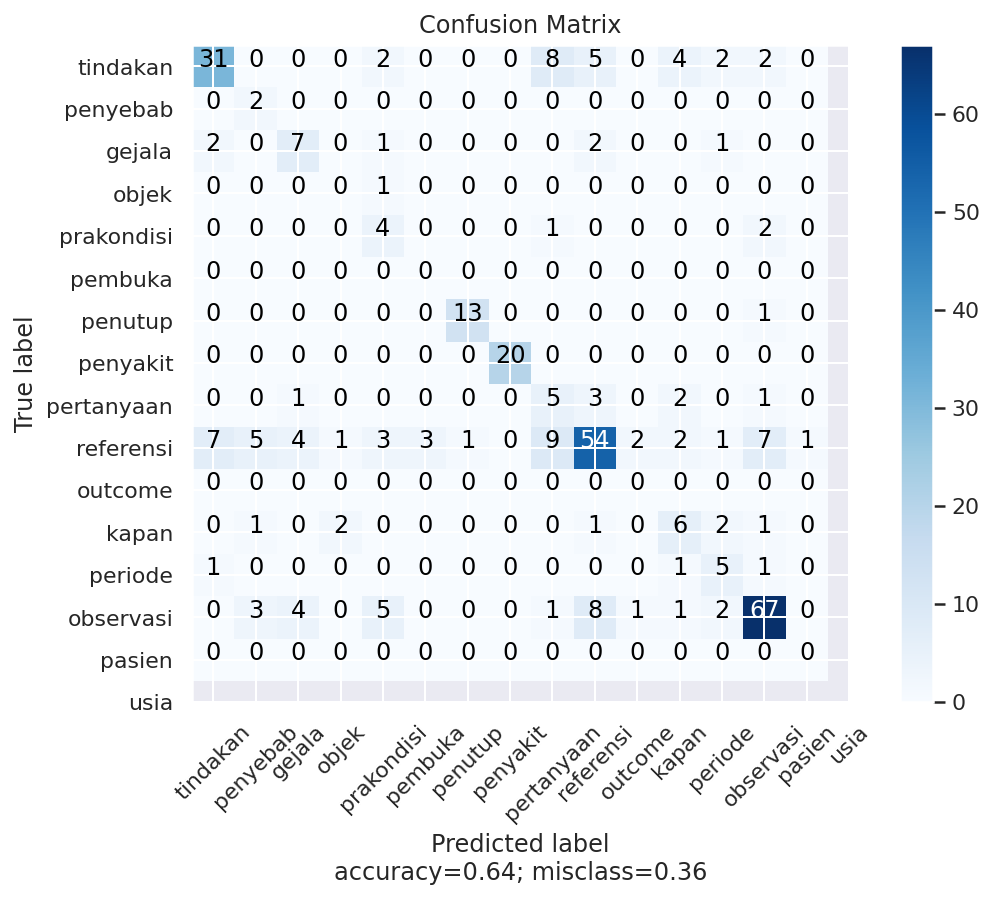

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.57      0.76      0.65        41
       kapan       1.00      0.18      0.31        11
       objek       0.54      0.44      0.48        16
   observasi       0.00      0.00      0.00         3
     outcome       0.57      0.25      0.35        16
      pasien       0.00      0.00      0.00         3
     pembuka       0.93      0.93      0.93        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.42      0.21      0.28        24
    penyebab       0.54      0.74      0.62        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.46      0.38      0.41        16
   referensi       0.62      0.38      0.48        13
    tindakan       0.73      0.82      0.77        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.64       336
   macro avg       0.49      0.41      0.42       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.6369047619047619


### Logistic Regression

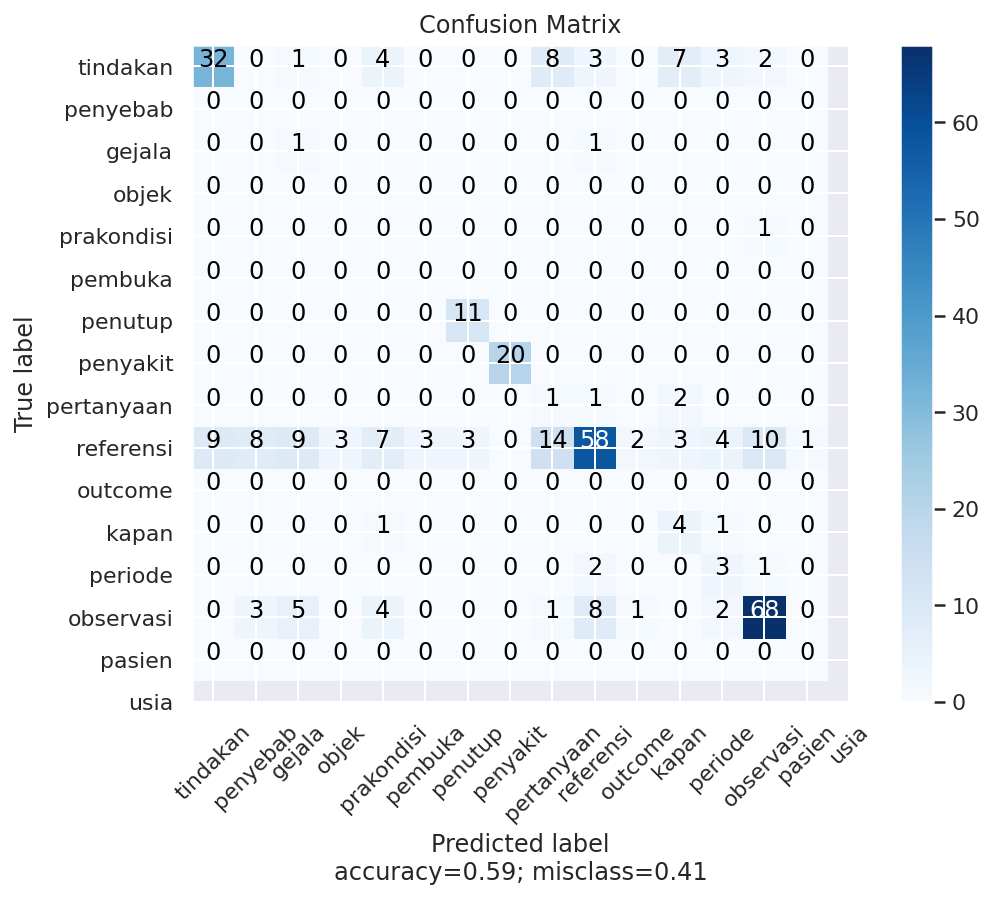

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.53      0.78      0.63        41
       kapan       0.00      0.00      0.00        11
       objek       0.50      0.06      0.11        16
   observasi       0.00      0.00      0.00         3
     outcome       0.00      0.00      0.00        16
      pasien       0.00      0.00      0.00         3
     pembuka       1.00      0.79      0.88        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.25      0.04      0.07        24
    penyebab       0.43      0.79      0.56        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.67      0.25      0.36        16
   referensi       0.50      0.23      0.32        13
    tindakan       0.74      0.83      0.78        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.59       336
   macro avg       0.37      0.32      0.31       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5892857142857143


## Model 70% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1173
Banyak data x_test  : 503
Banyak data y_train : 1173
Banyak data y_test  : 503


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
data

Label                                  Isi  questionflag
0      pembuka                         selamat sore             0
1      pembuka                         terima kasih             0
2       gejala                          sakit perut             0
3       gejala                              kembung             0
4       gejala                            buang gas             0
...        ...                                  ...           ...
1671  tindakan                            istirahat             0
1672  tindakan                  makan makan nutrisi             0
1673  tindakan               jaga berat badan ideal             0
1674  tindakan  konsultasi dokter spesialis kandung             0
1675   penutup                          salam sehat             0

[1676 rows x 3 columns]

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      129
penyebab      111
gejala         59
penyakit       35
objek          27
prakondisi     27
penutup        25
pembuka        22
outcome        21
referensi      17
kapan          13
observasi       6
pasien          5
periode         4
usia            1
pertanyaan      1
Name: Label, dtype: int64

### MultinomialNB

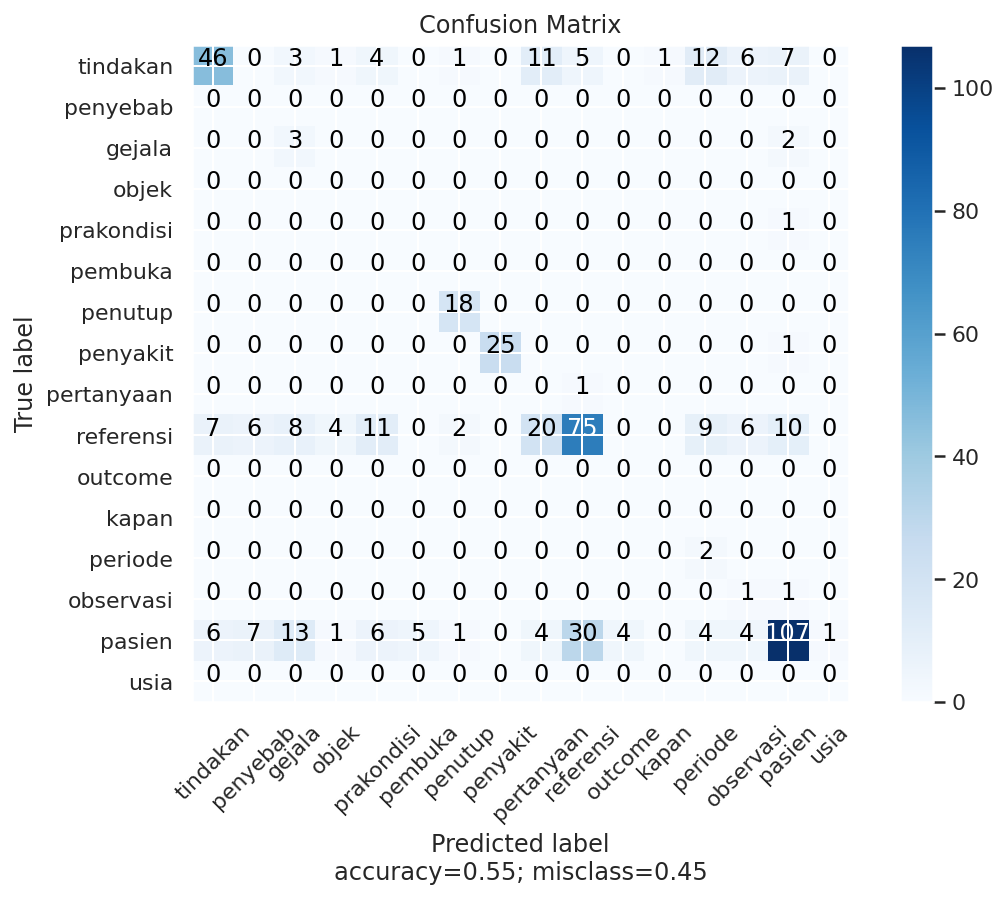

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.47      0.78      0.59        59
       kapan       0.00      0.00      0.00        13
       objek       0.60      0.11      0.19        27
   observasi       0.00      0.00      0.00         6
     outcome       0.00      0.00      0.00        21
      pasien       0.00      0.00      0.00         5
     pembuka       1.00      0.82      0.90        22
     penutup       0.96      1.00      0.98        25
    penyakit       0.00      0.00      0.00        35
    penyebab       0.47      0.68      0.56       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       1.00      0.07      0.14        27
   referensi       0.50      0.06      0.11        17
    tindakan       0.55      0.83      0.66       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.55       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.5506958250497018


### SVM, Linear SVC

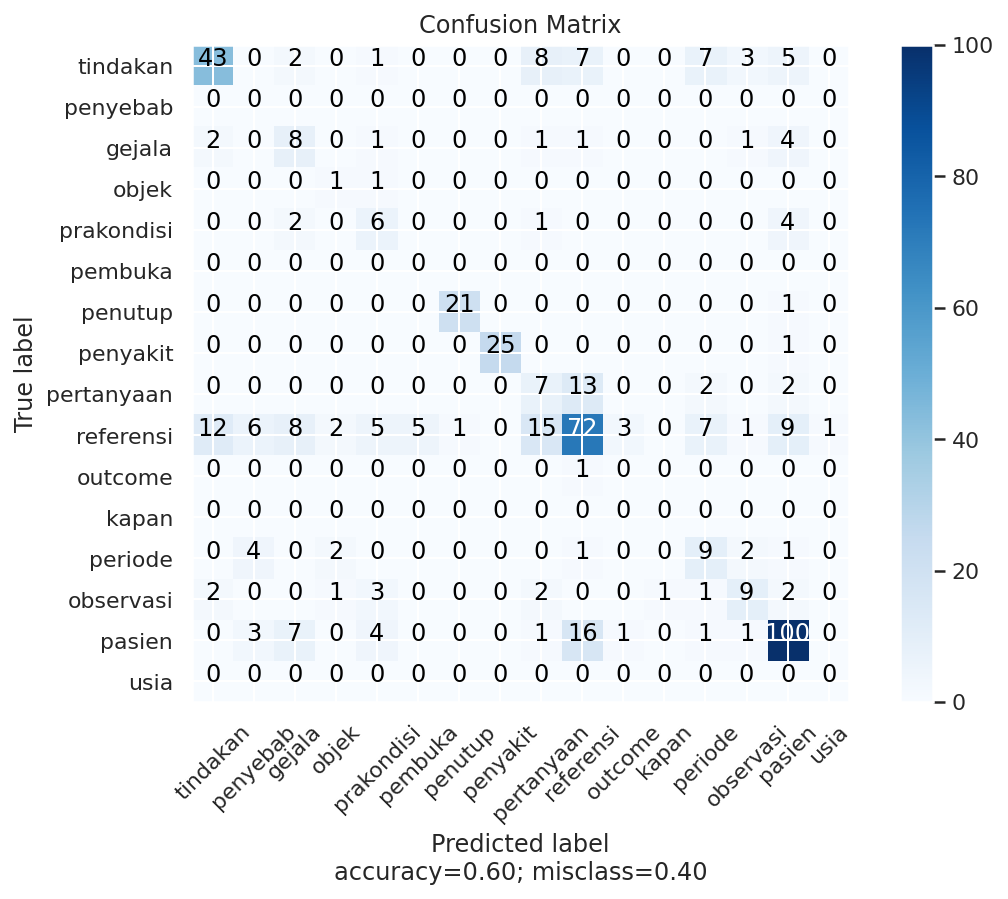

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.57      0.73      0.64        59
       kapan       0.00      0.00      0.00        13
       objek       0.44      0.30      0.36        27
   observasi       0.50      0.17      0.25         6
     outcome       0.46      0.29      0.35        21
      pasien       0.00      0.00      0.00         5
     pembuka       0.95      0.95      0.95        22
     penutup       0.96      1.00      0.98        25
    penyakit       0.29      0.20      0.24        35
    penyebab       0.49      0.65      0.56       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       0.47      0.33      0.39        27
   referensi       0.43      0.53      0.47        17
    tindakan       0.75      0.78      0.76       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.60       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5984095427435387


### Logistic Regression

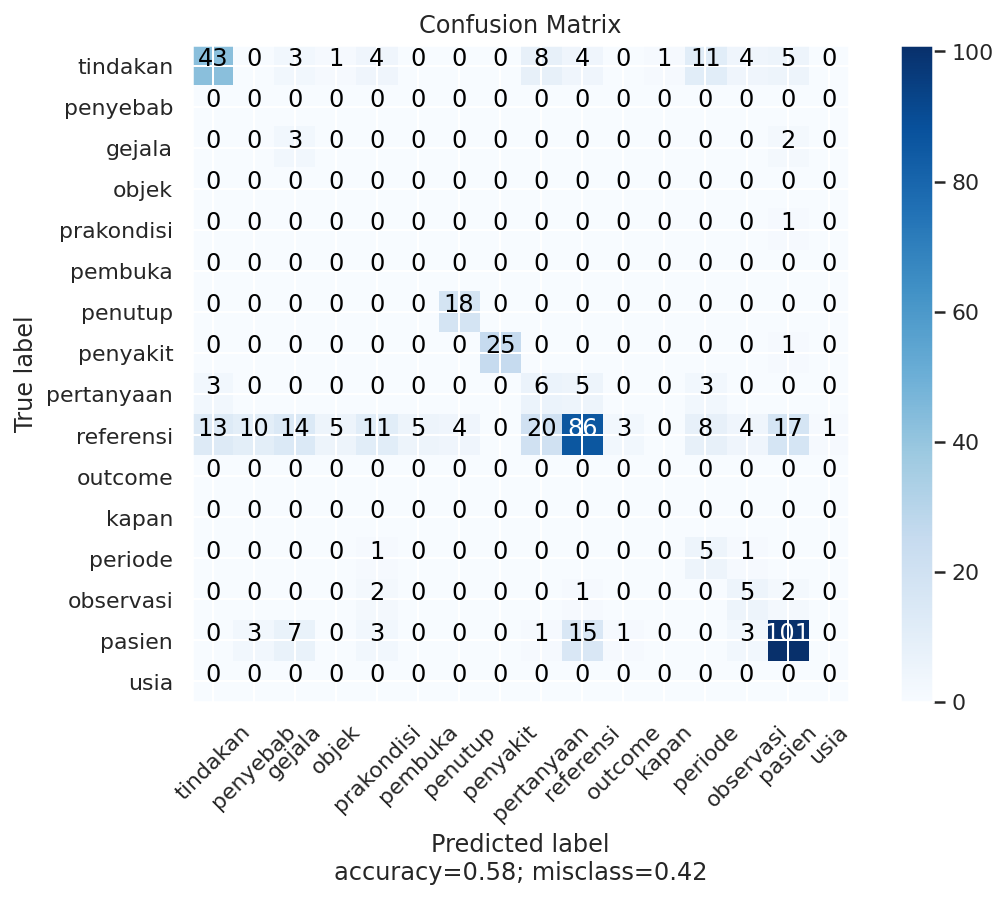

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.51      0.73      0.60        59
       kapan       0.00      0.00      0.00        13
       objek       0.60      0.11      0.19        27
   observasi       0.00      0.00      0.00         6
     outcome       0.00      0.00      0.00        21
      pasien       0.00      0.00      0.00         5
     pembuka       1.00      0.82      0.90        22
     penutup       0.96      1.00      0.98        25
    penyakit       0.35      0.17      0.23        35
    penyebab       0.43      0.77      0.55       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       0.71      0.19      0.29        27
   referensi       0.50      0.29      0.37        17
    tindakan       0.75      0.78      0.77       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.58       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5805168986083499


## Model 50% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 838
Banyak data x_test  : 838
Banyak data y_train : 838
Banyak data y_test  : 838


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
data

Label                                  Isi  questionflag
0      pembuka                         selamat sore             0
1      pembuka                         terima kasih             0
2       gejala                          sakit perut             0
3       gejala                              kembung             0
4       gejala                            buang gas             0
...        ...                                  ...           ...
1671  tindakan                            istirahat             0
1672  tindakan                  makan makan nutrisi             0
1673  tindakan               jaga berat badan ideal             0
1674  tindakan  konsultasi dokter spesialis kandung             0
1675   penutup                          salam sehat             0

[1676 rows x 3 columns]

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      216
penyebab      192
gejala        112
penyakit       56
prakondisi     49
objek          42
penutup        39
pembuka        34
outcome        33
referensi      27
kapan          14
observasi       8
pasien          7
periode         6
pertanyaan      2
usia            1
Name: Label, dtype: int64

### MultinomialNB

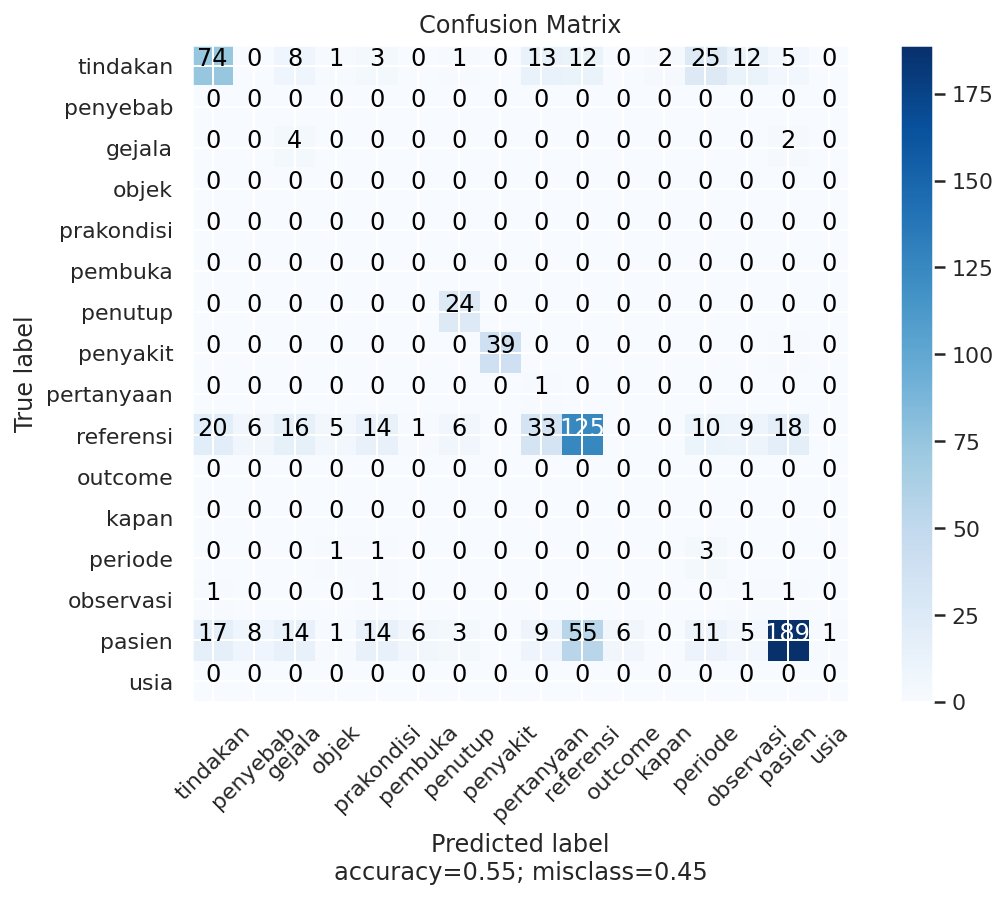

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.47      0.66      0.55       112
       kapan       0.00      0.00      0.00        14
       objek       0.67      0.10      0.17        42
   observasi       0.00      0.00      0.00         8
     outcome       0.00      0.00      0.00        33
      pasien       0.00      0.00      0.00         7
     pembuka       1.00      0.71      0.83        34
     penutup       0.97      1.00      0.99        39
    penyakit       1.00      0.02      0.04        56
    penyebab       0.48      0.65      0.55       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.60      0.06      0.11        49
   referensi       0.25      0.04      0.06        27
    tindakan       0.56      0.88      0.68       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.55       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.548926014319809


### SVM, Linear SVC

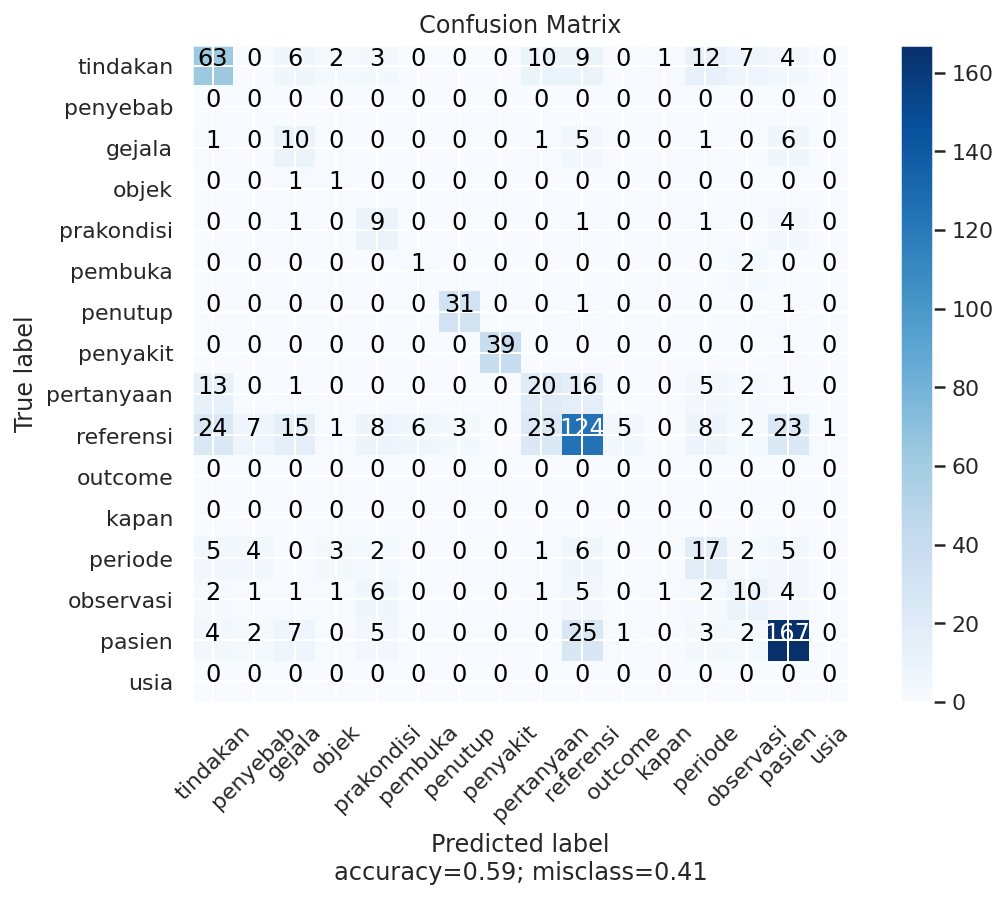

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.54      0.56      0.55       112
       kapan       0.00      0.00      0.00        14
       objek       0.42      0.24      0.30        42
   observasi       0.50      0.12      0.20         8
     outcome       0.56      0.27      0.37        33
      pasien       0.33      0.14      0.20         7
     pembuka       0.94      0.91      0.93        34
     penutup       0.97      1.00      0.99        39
    penyakit       0.34      0.36      0.35        56
    penyebab       0.50      0.65      0.56       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.38      0.35      0.36        49
   referensi       0.29      0.37      0.33        27
    tindakan       0.77      0.77      0.77       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.59       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5871121718377088


### Logistic Regression

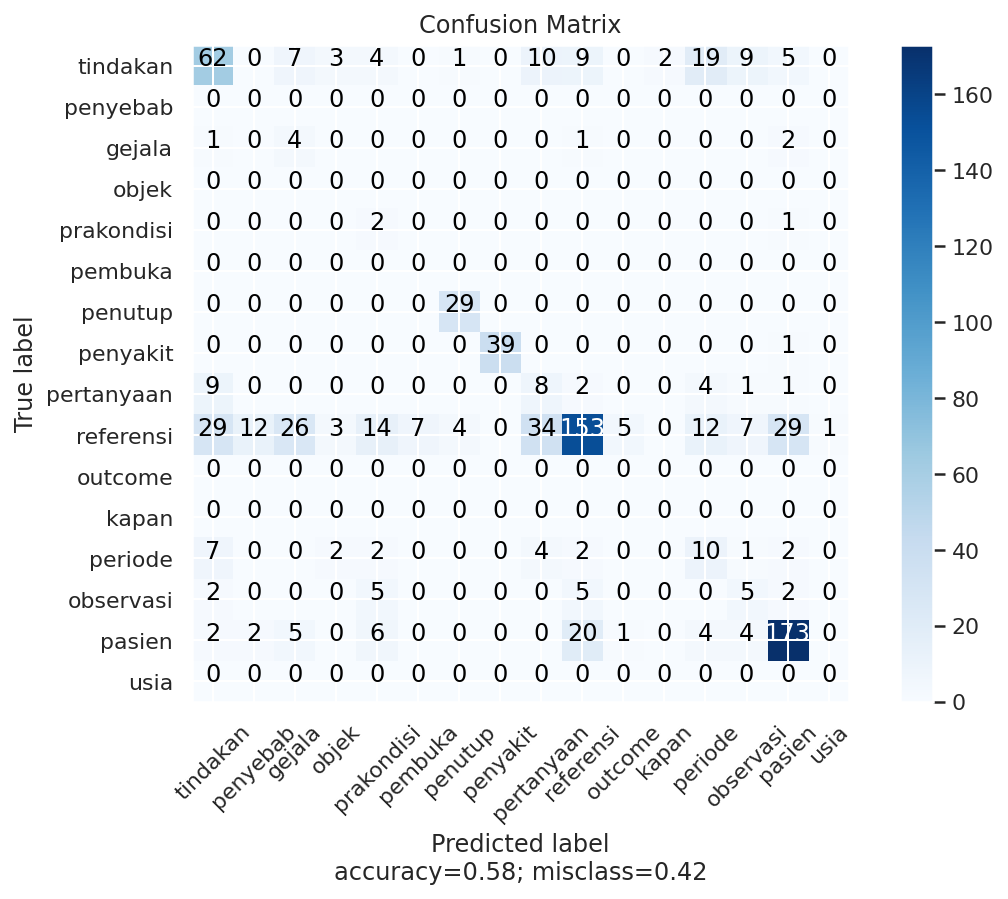

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.47      0.55      0.51       112
       kapan       0.00      0.00      0.00        14
       objek       0.50      0.10      0.16        42
   observasi       0.00      0.00      0.00         8
     outcome       0.67      0.06      0.11        33
      pasien       0.00      0.00      0.00         7
     pembuka       1.00      0.85      0.92        34
     penutup       0.97      1.00      0.99        39
    penyakit       0.32      0.14      0.20        56
    penyebab       0.46      0.80      0.58       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.33      0.20      0.25        49
   referensi       0.26      0.19      0.22        27
    tindakan       0.80      0.80      0.80       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.58       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5787589498806682


# TF

## Model 80% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1340
Banyak data x_test  : 336
Banyak data y_train : 1340
Banyak data y_test  : 336


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      82
penyebab      73
gejala        41
penyakit      24
penutup       20
outcome       16
objek         16
prakondisi    16
pembuka       14
referensi     13
kapan         11
periode        3
observasi      3
pasien         3
usia           1
Name: Label, dtype: int64

### MultinomialNB

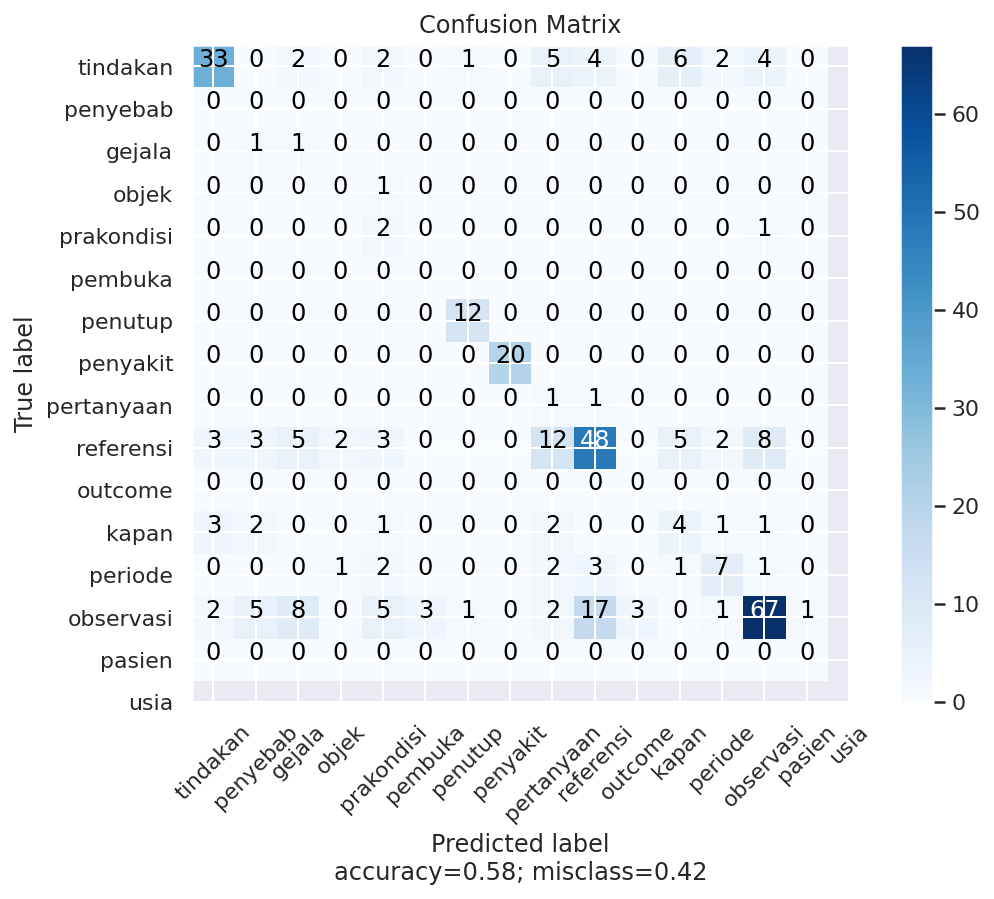

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.56      0.80      0.66        41
       kapan       0.00      0.00      0.00        11
       objek       0.50      0.06      0.11        16
   observasi       0.00      0.00      0.00         3
     outcome       0.67      0.12      0.21        16
      pasien       0.00      0.00      0.00         3
     pembuka       1.00      0.86      0.92        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.50      0.04      0.08        24
    penyebab       0.53      0.66      0.59        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.29      0.25      0.27        16
   referensi       0.41      0.54      0.47        13
    tindakan       0.58      0.82      0.68        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.58       336
   macro avg       0.40      0.34      0.33       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.5803571428571429


### SVM, Linear SVC

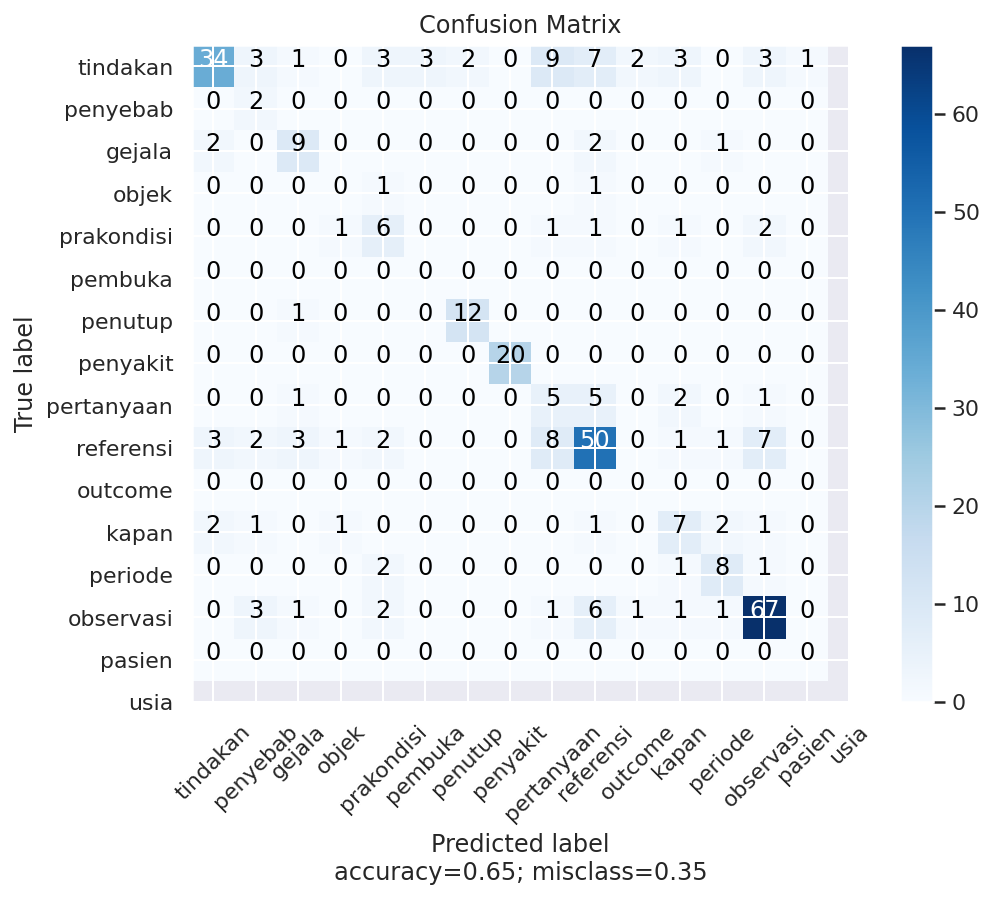

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.48      0.83      0.61        41
       kapan       1.00      0.18      0.31        11
       objek       0.64      0.56      0.60        16
   observasi       0.00      0.00      0.00         3
     outcome       0.50      0.38      0.43        16
      pasien       0.00      0.00      0.00         3
     pembuka       0.92      0.86      0.89        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.36      0.21      0.26        24
    penyebab       0.64      0.68      0.66        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.47      0.44      0.45        16
   referensi       0.67      0.62      0.64        13
    tindakan       0.81      0.82      0.81        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.65       336
   macro avg       0.50      0.44      0.44       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.6547619047619048


### Logistic Regression

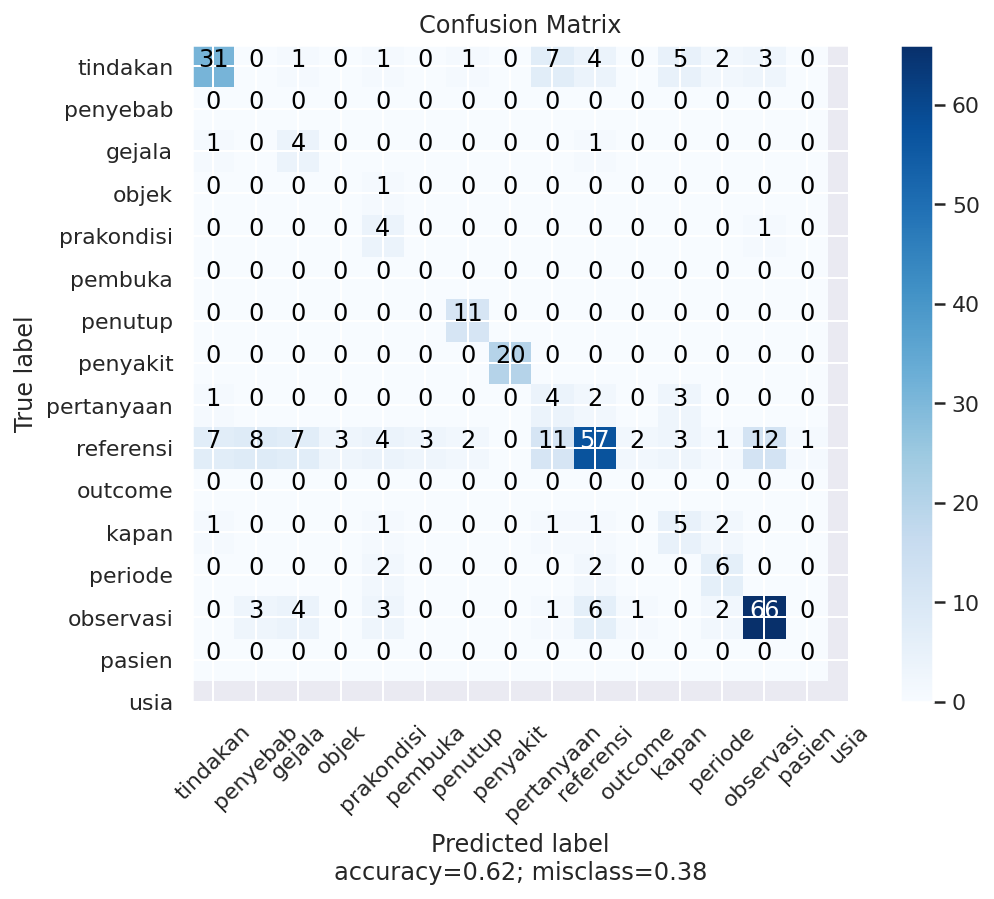

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.56      0.76      0.65        41
       kapan       0.00      0.00      0.00        11
       objek       0.67      0.25      0.36        16
   observasi       0.00      0.00      0.00         3
     outcome       0.80      0.25      0.38        16
      pasien       0.00      0.00      0.00         3
     pembuka       1.00      0.79      0.88        14
     penutup       1.00      1.00      1.00        20
    penyakit       0.40      0.17      0.24        24
    penyebab       0.47      0.78      0.59        73
     periode       0.00      0.00      0.00         3
  prakondisi       0.45      0.31      0.37        16
   referensi       0.60      0.46      0.52        13
    tindakan       0.77      0.80      0.79        82
        usia       0.00      0.00      0.00         1

    accuracy                           0.62       336
   macro avg       0.45      0.37      0.38       336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.6190476190476191


## Model 70% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 1173
Banyak data x_test  : 503
Banyak data y_train : 1173
Banyak data y_test  : 503


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
data

Label                                  Isi  questionflag
0      pembuka                         selamat sore             0
1      pembuka                         terima kasih             0
2       gejala                          sakit perut             0
3       gejala                              kembung             0
4       gejala                            buang gas             0
...        ...                                  ...           ...
1671  tindakan                            istirahat             0
1672  tindakan                  makan makan nutrisi             0
1673  tindakan               jaga berat badan ideal             0
1674  tindakan  konsultasi dokter spesialis kandung             0
1675   penutup                          salam sehat             0

[1676 rows x 3 columns]

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      129
penyebab      111
gejala         59
penyakit       35
objek          27
prakondisi     27
penutup        25
pembuka        22
outcome        21
referensi      17
kapan          13
observasi       6
pasien          5
periode         4
usia            1
pertanyaan      1
Name: Label, dtype: int64

### MultinomialNB

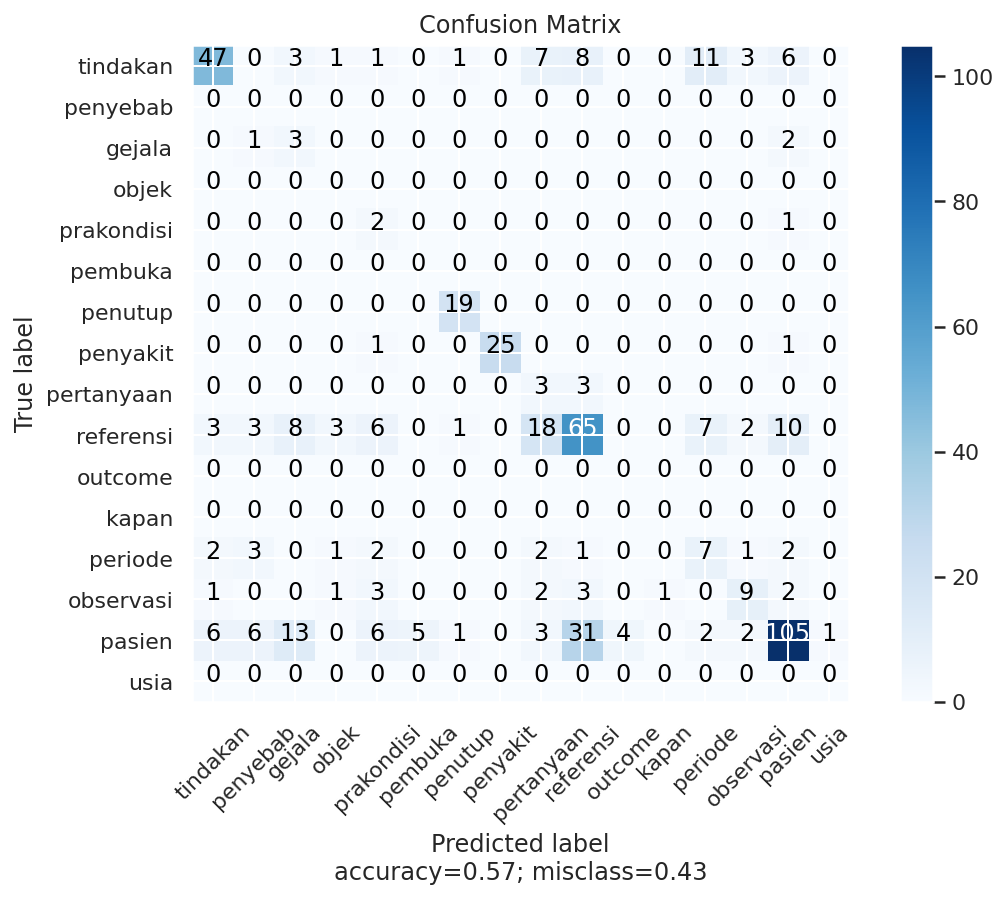

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.53      0.80      0.64        59
       kapan       0.00      0.00      0.00        13
       objek       0.50      0.11      0.18        27
   observasi       0.00      0.00      0.00         6
     outcome       0.67      0.10      0.17        21
      pasien       0.00      0.00      0.00         5
     pembuka       1.00      0.86      0.93        22
     penutup       0.93      1.00      0.96        25
    penyakit       0.50      0.09      0.15        35
    penyebab       0.52      0.59      0.55       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       0.33      0.26      0.29        27
   referensi       0.41      0.53      0.46        17
    tindakan       0.57      0.81      0.67       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.57       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.5666003976143141


### SVM, Linear SVC

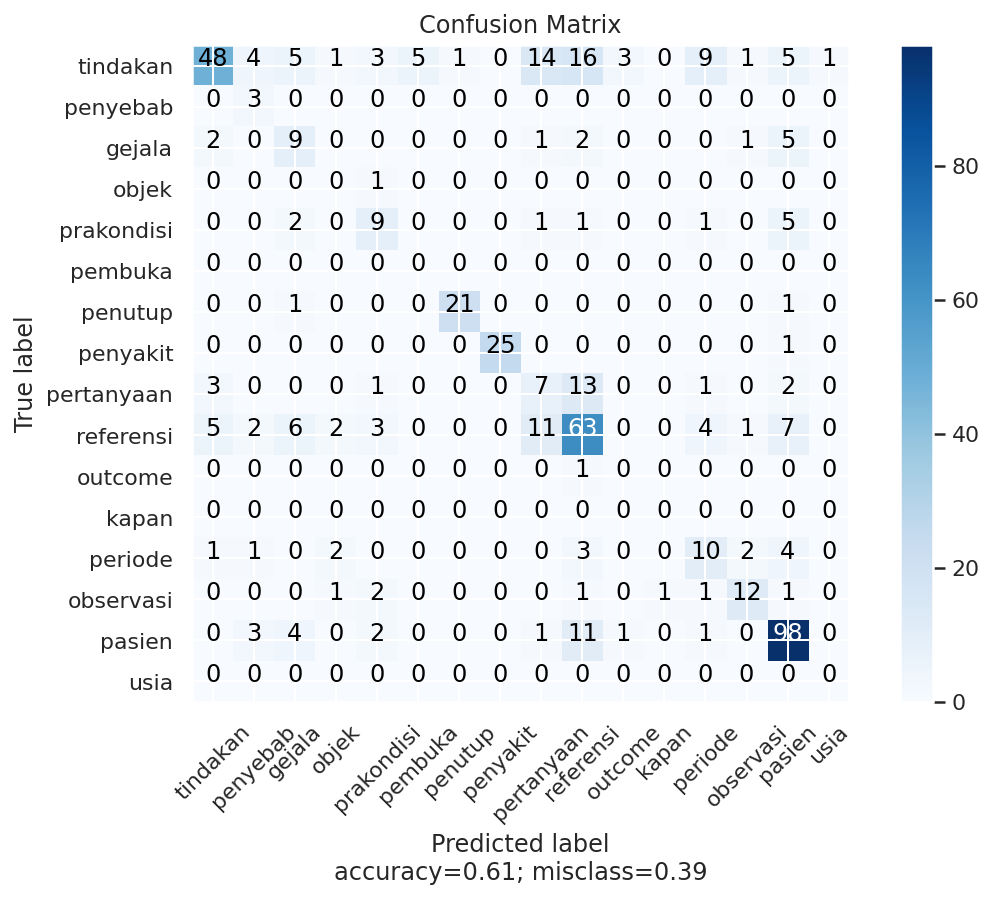

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.41      0.81      0.55        59
       kapan       1.00      0.23      0.38        13
       objek       0.45      0.33      0.38        27
   observasi       0.00      0.00      0.00         6
     outcome       0.47      0.43      0.45        21
      pasien       0.00      0.00      0.00         5
     pembuka       0.91      0.95      0.93        22
     penutup       0.96      1.00      0.98        25
    penyakit       0.26      0.20      0.23        35
    penyebab       0.61      0.57      0.59       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       0.43      0.37      0.40        27
   referensi       0.63      0.71      0.67        17
    tindakan       0.81      0.76      0.78       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.61       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.6063618290258449


### Logistic Regression

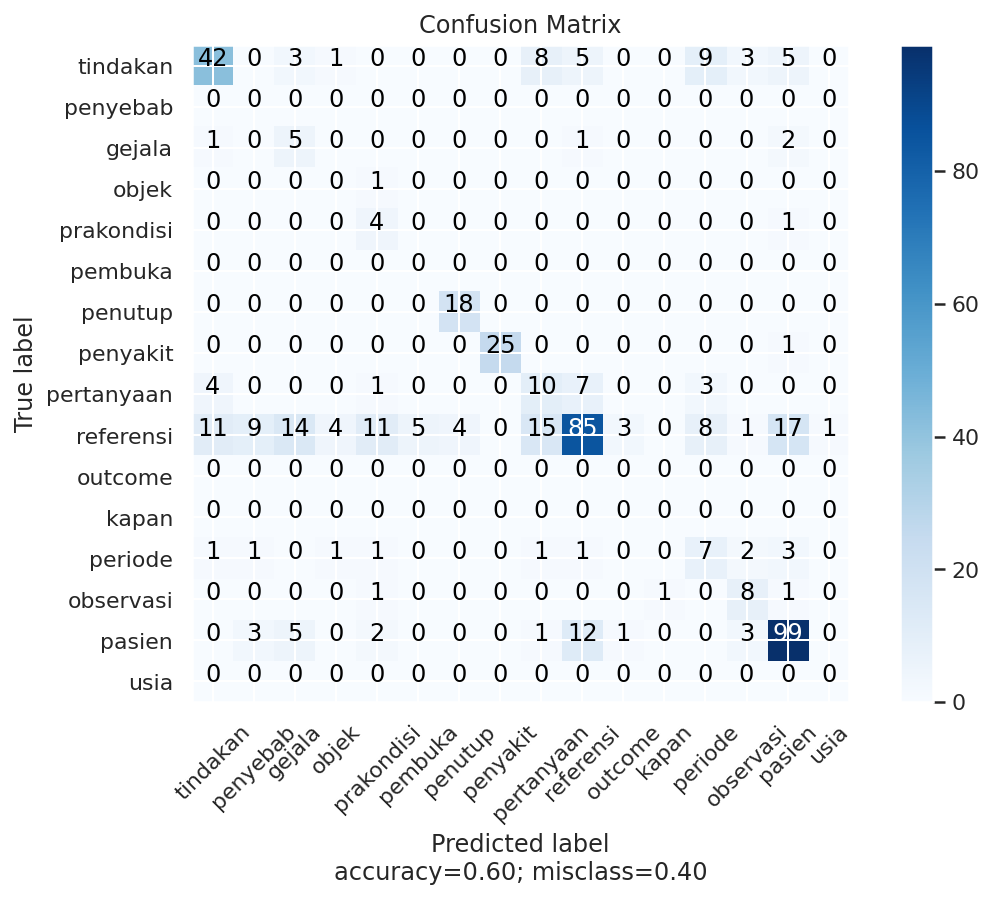

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.55      0.71      0.62        59
       kapan       0.00      0.00      0.00        13
       objek       0.56      0.19      0.28        27
   observasi       0.00      0.00      0.00         6
     outcome       0.80      0.19      0.31        21
      pasien       0.00      0.00      0.00         5
     pembuka       1.00      0.82      0.90        22
     penutup       0.96      1.00      0.98        25
    penyakit       0.40      0.29      0.33        35
    penyebab       0.45      0.77      0.57       111
     periode       0.00      0.00      0.00         4
  pertanyaan       0.00      0.00      0.00         1
  prakondisi       0.39      0.26      0.31        27
   referensi       0.73      0.47      0.57        17
    tindakan       0.79      0.77      0.78       129
        usia       0.00      0.00      0.00         1

    accuracy                           0.60       503


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.6023856858846919


## Model 50% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 838
Banyak data x_test  : 838
Banyak data y_train : 838
Banyak data y_test  : 838


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
data

Label                                  Isi  questionflag
0      pembuka                         selamat sore             0
1      pembuka                         terima kasih             0
2       gejala                          sakit perut             0
3       gejala                              kembung             0
4       gejala                            buang gas             0
...        ...                                  ...           ...
1671  tindakan                            istirahat             0
1672  tindakan                  makan makan nutrisi             0
1673  tindakan               jaga berat badan ideal             0
1674  tindakan  konsultasi dokter spesialis kandung             0
1675   penutup                          salam sehat             0

[1676 rows x 3 columns]

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

tindakan      216
penyebab      192
gejala        112
penyakit       56
prakondisi     49
objek          42
penutup        39
pembuka        34
outcome        33
referensi      27
kapan          14
observasi       8
pasien          7
periode         6
pertanyaan      2
usia            1
Name: Label, dtype: int64

### MultinomialNB

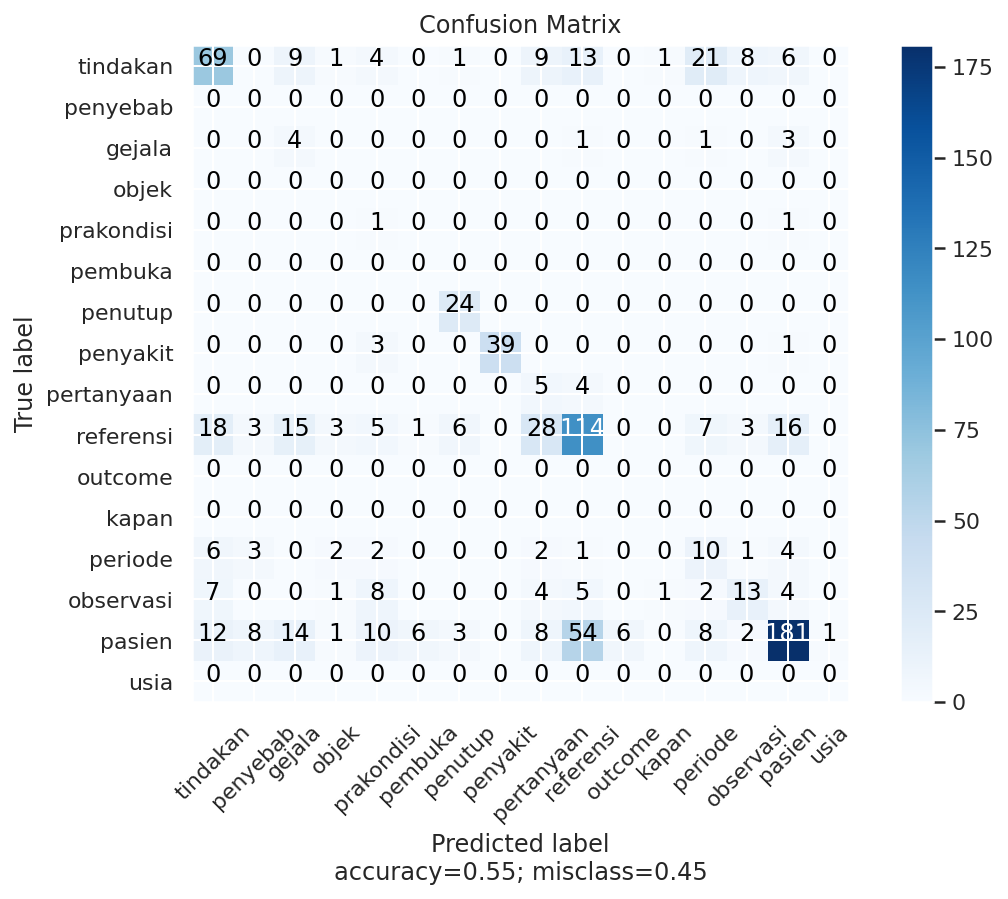

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.49      0.62      0.54       112
       kapan       0.00      0.00      0.00        14
       objek       0.44      0.10      0.16        42
   observasi       0.00      0.00      0.00         8
     outcome       0.50      0.03      0.06        33
      pasien       0.00      0.00      0.00         7
     pembuka       1.00      0.71      0.83        34
     penutup       0.91      1.00      0.95        39
    penyakit       0.56      0.09      0.15        56
    penyebab       0.52      0.59      0.55       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.32      0.20      0.25        49
   referensi       0.29      0.48      0.36        27
    tindakan       0.58      0.84      0.68       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.55       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.548926014319809


### SVM, Linear SVC

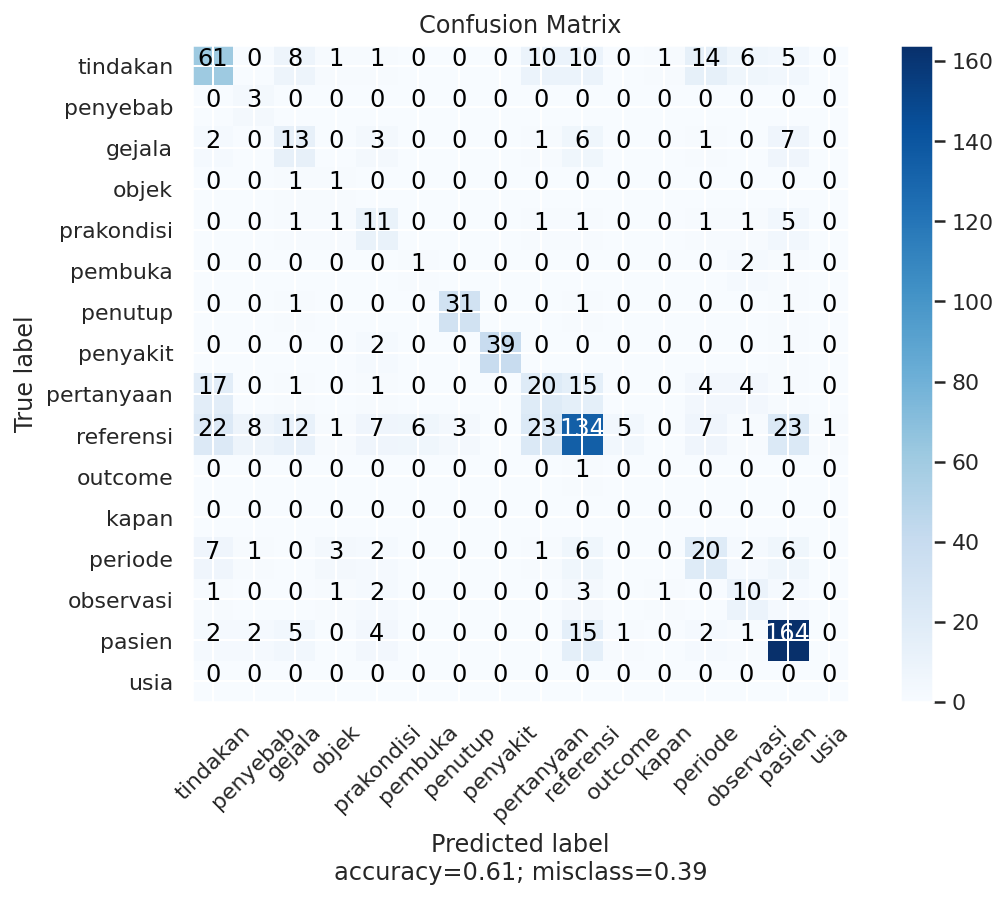

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.52      0.54      0.53       112
       kapan       1.00      0.21      0.35        14
       objek       0.39      0.31      0.35        42
   observasi       0.50      0.12      0.20         8
     outcome       0.50      0.33      0.40        33
      pasien       0.25      0.14      0.18         7
     pembuka       0.91      0.91      0.91        34
     penutup       0.93      1.00      0.96        39
    penyakit       0.32      0.36      0.34        56
    penyebab       0.53      0.70      0.60       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.42      0.41      0.41        49
   referensi       0.50      0.37      0.43        27
    tindakan       0.84      0.76      0.80       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.61       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.6062052505966588


### Logistic Regression

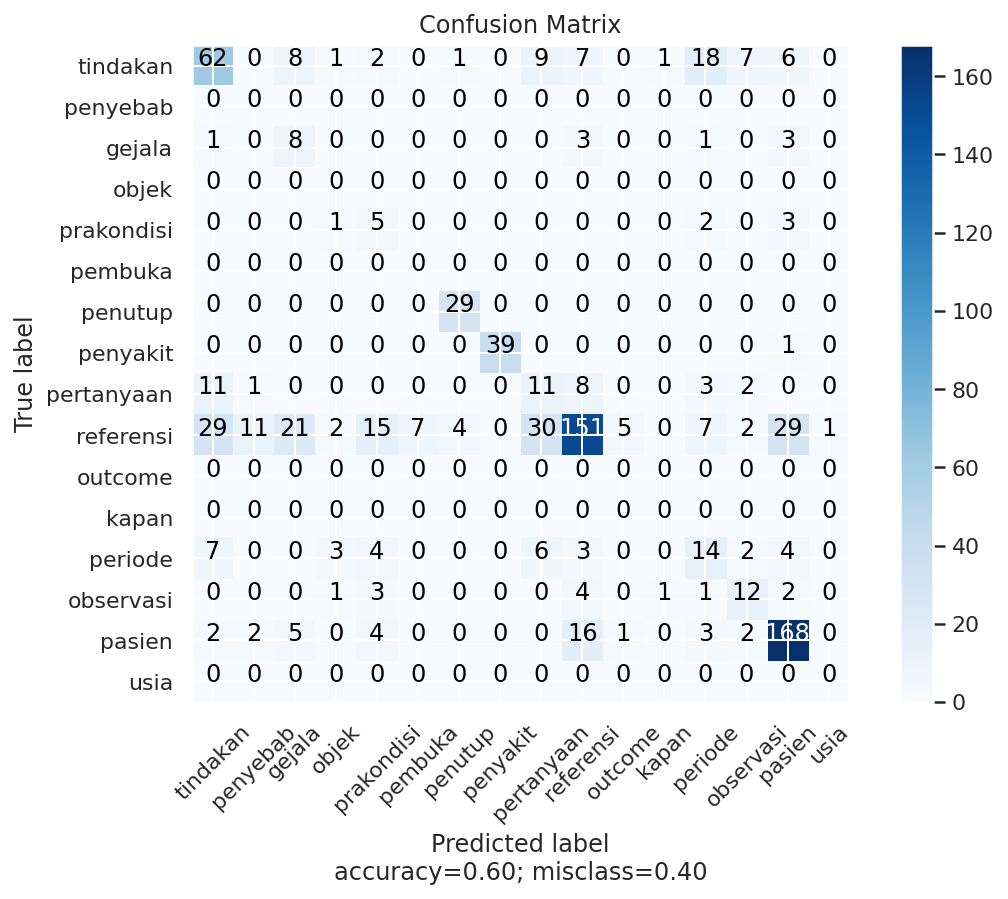

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.51      0.55      0.53       112
       kapan       0.00      0.00      0.00        14
       objek       0.50      0.19      0.28        42
   observasi       0.00      0.00      0.00         8
     outcome       0.45      0.15      0.23        33
      pasien       0.00      0.00      0.00         7
     pembuka       1.00      0.85      0.92        34
     penutup       0.97      1.00      0.99        39
    penyakit       0.31      0.20      0.24        56
    penyebab       0.48      0.79      0.60       192
     periode       0.00      0.00      0.00         6
  pertanyaan       0.00      0.00      0.00         2
  prakondisi       0.33      0.29      0.30        49
   referensi       0.50      0.44      0.47        27
    tindakan       0.83      0.78      0.80       216
        usia       0.00      0.00      0.00         1

    accuracy                           0.60       838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5954653937947494
